# Welcome to Quixotic

## What is Quixotic?
> Quixotic is a Python library for low-code, simple-to-use quantum computing.

## Features
- Easy-to-apply quantum solutions to a number of combinatorial optimization problems using [Quantum Annealing](https://en.wikipedia.org/wiki/Quantum_annealing) and [QAOA](https://arxiv.org/abs/1411.4028).
- Includes out-of-the-box support for various optimization problems like maximum clique and minimum vertex cover.
- Supports execution using both local simulation on your laptop and managed quantum computers on [Amazon Braket](https://aws.amazon.com/braket/).

## Install

1. `pip install -U pip`
2. `pip install quixotic`

**NOTE**: Python version `>= 3.7` is required.

## Usage: Find Maximum Clique in a Graph

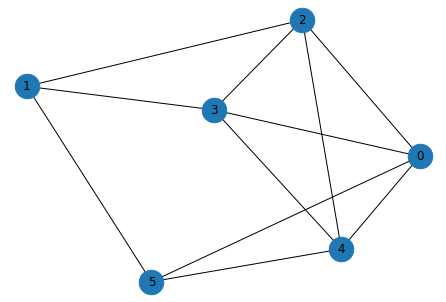

In [1]:
# construct or load your input graph
import networkx as nx
n_nodes = 6
p = 0.5  # probability of an edge
seed = 1967
g = nx.erdos_renyi_graph(n_nodes, p=p, seed=seed)
positions = nx.spring_layout(g, seed=seed)
nx.draw(g, with_labels=True, pos=positions, node_size=600)

In [2]:
# approximate a solution using QuantumAnnealer and extract results
from quixotic.core import QuantumAnnealer
qo = QuantumAnnealer(g, task='maximum_clique').fit()
nodes = qo.results()

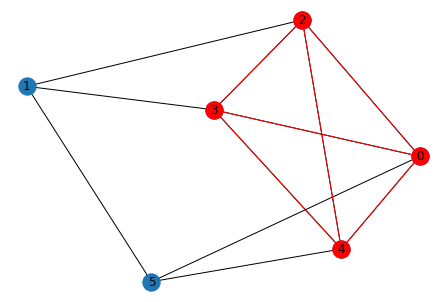

In [3]:
# plot nodes comprising the solution
sub = g.subgraph(nodes)
nx.draw(g, pos=positions, with_labels=True)
nx.draw(sub, pos=positions, node_color="r", edge_color="r")

#### To execute on a Quantum Computer
By default, **Quixotic** uses a local solver or simulator (e.g., simulated annealing insetad of quantum annealing), which allows you to easily run and test on your CPU-based laptop.  To run on an actual managed quantum computer hosted on Amazon Braket, simply set the `device_arn` and `s3_folder` parameters.  For `QuantumAnnealer`,  the `device_arn` should be a D-Wave QPU:
```python
# running on Amazon Braket
from quixotic.core import QuantumAnnealer
qo = QuantumAnnealer(g, task='maximum_clique',
                    device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6',  # D-Wave QPU
                    s3_folder = ("amazon-braket-Your-Bucket-Name", "Your-Folder-Name"))
qo.fit()
nodes = qo.results()
```